In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ylikhithasatyasreeja","key":"8a49a51044b5dae87ce557111e57ea09"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

 99% 216M/218M [00:08<00:00, 32.4MB/s]
100% 218M/218M [00:08<00:00, 25.4MB/s]


In [ ]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/training_set/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/test_set/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2023 images belonging to 2 classes.


In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [ ]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
classifier.add(Conv2D(64, (3, 3),  activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
classifier.add(Flatten())

In [ ]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)              

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 10)

<ipython-input-27-ebb3a2564e37>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set,


Epoch 1/50
100/100 [==============================] - 42s 406ms/step - loss: 0.6983 - accuracy: 0.5097 - val_loss: 0.6904 - val_accuracy: 0.5063
Epoch 2/50
100/100 [==============================] - 35s 349ms/step - loss: 0.6629 - accuracy: 0.6206 - val_loss: 0.6155 - val_accuracy: 0.6938
Epoch 3/50
100/100 [==============================] - 35s 350ms/step - loss: 0.6460 - accuracy: 0.6291 - val_loss: 0.6420 - val_accuracy: 0.5938
Epoch 4/50
100/100 [==============================] - 34s 336ms/step - loss: 0.6253 - accuracy: 0.6461 - val_loss: 0.6258 - val_accuracy: 0.6625
Epoch 5/50
100/100 [==============================] - 34s 340ms/step - loss: 0.5989 - accuracy: 0.6829 - val_loss: 0.6613 - val_accuracy: 0.6469
Epoch 6/50
100/100 [==============================] - 34s 344ms/step - loss: 0.5774 - accuracy: 0.6927 - val_loss: 0.5566 - val_accuracy: 0.7188
Epoch 7/50
100/100 [==============================] - 33s 333ms/step - loss: 0.5660 - accuracy: 0.7103 - val_loss: 0.5598 - val_ac

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cat2.jpg to cat2.jpg
User uploaded file "cat2.jpg" with length 7010 bytes


In [ ]:
from keras.preprocessing import image
import numpy as np

In [ ]:
from keras.utils import load_img

test_image = load_img('cat2.jpg', target_size=(64,64))
test_image2 = load_img('dog.jpg', target_size=(64,64))

In [ ]:
import keras.utils as image
test_image = image.img_to_array(test_image)
test_image2 = image.img_to_array(test_image2)

In [ ]:
test_image = np.expand_dims(test_image, axis=0)
test_image2 = np.expand_dims(test_image2, axis=0)

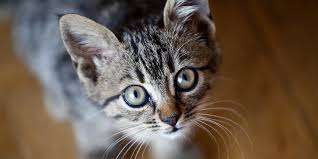

In [ ]:
from IPython.display import Image
Image(filename="cat2.jpg")

In [ ]:
result = classifier.predict(test_image)
result2 = classifier.predict(test_image2)

1/1 [==============================] - 0s 25ms/step


In [ ]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
print(result)
print(result2)

[[0.]]
[[1.]]


In [ ]:
if result[0][0] == 0:
  print("Cat")
else:
  print("Dog")

Cat


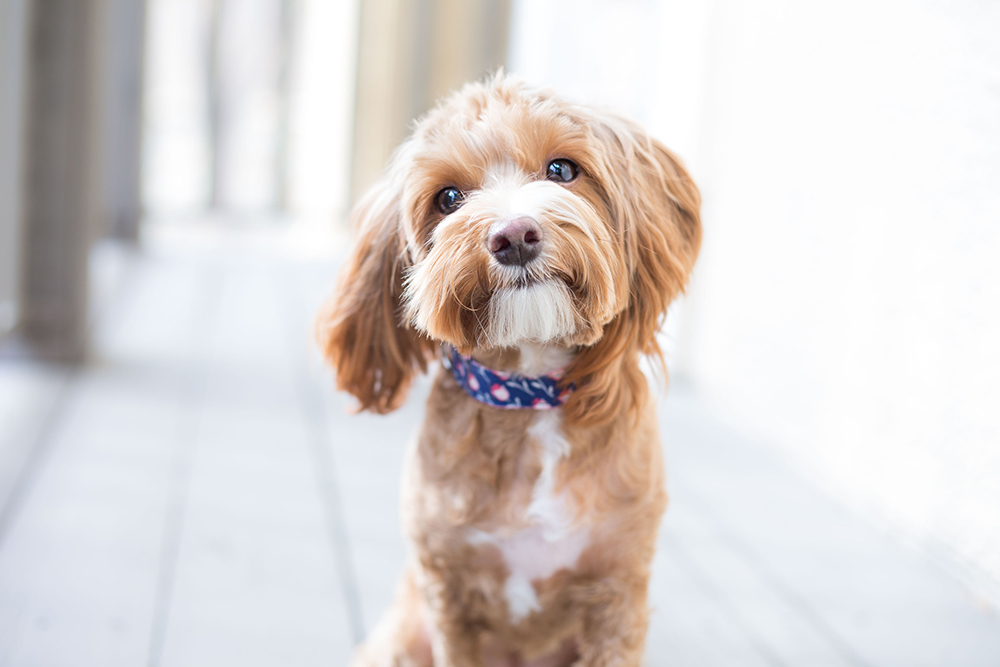

In [ ]:
Image(filename="dog.jpg")

In [ ]:
if result2[0][0] == 0:
  print("Cat")
else:
  print("Dog")

Dog
